# Wine Data Set - What are the best wines in the world and what describes them
### Earthy? Chocolate? Fruity? Etc.

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

sns.set(color_codes=True)
url = 'https://www.kaggle.com/zynicide/wine-reviews/data'

wine = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Data Wrangling - Let's clean the dataset before doing EDA

In [267]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In this dataset, there are wineries without countries filled in. Since wineries are not like businesses and they tend to only have one location, let's fill in the missing country data based on where the winery is located.

In [268]:
wine.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [269]:
# Create a winery to country map to missing misisng country values in DataFrame
country_to_continent_map = {}
for i in zip(wine.country, wine.winery):
    if i[1] not in country_to_continent_map and pd.notnull(i[0]):
        country_to_continent_map[i[1]] = i[0]
country_to_continent_map

wine['country'] = wine.winery.map(country_to_continent_map)
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129940 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


After accurately mapping 32 missing country values, there are still countries that are missing from the dataset. Let's drop those values along with any duplicates.

In [270]:
wine = wine.drop_duplicates() # Drop duplicate rows
wine = wine[pd.notnull(wine.country)] # Drop missing country values
wine = wine[pd.notnull(wine.price)]   # Drop missing price values
wine = wine[pd.notnull(wine.variety)] # Drop missing variety values
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111562 entries, 1 to 129970
Data columns (total 13 columns):
country                  111562 non-null object
description              111562 non-null object
designation              79508 non-null object
points                   111562 non-null int64
price                    111562 non-null float64
province                 111537 non-null object
region_1                 93580 non-null object
region_2                 46568 non-null object
taster_name              88290 non-null object
taster_twitter_handle    83807 non-null object
title                    111562 non-null object
variety                  111562 non-null object
winery                   111562 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 11.9+ MB


Now we have a dataset that is clean of missing values and we can work with. Next let's do visual EDA to get familiar with the dataset.

## Visual EDA

In [271]:
df = wine.copy()
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


### What is the top wine producing country?

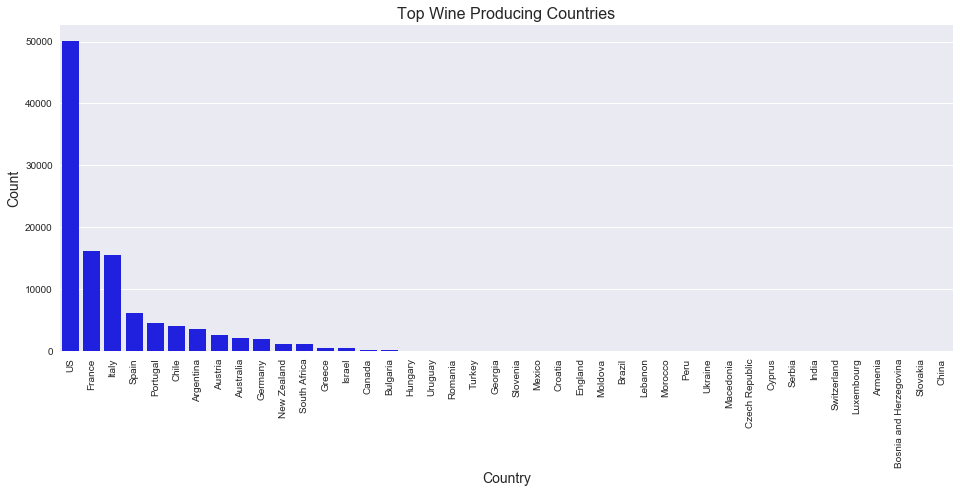

country    FranceItalySpainPortugal
count                         42320
dtype: object

In [272]:
df_temp_country = df.groupby('country', as_index=False)['variety'].count().\
                              sort_values(by='variety', ascending=False)
df_temp_country.columns = ['country', 'count']

fig = plt.figure(figsize=(16, 6))                                            
sns.barplot(x = 'country', y = 'count', color='blue', data=df_temp_country)  
plt.xlabel('Country', size=14)
plt.ylabel('Count', size=14)
plt.xticks(rotation=90)
plt.title('Top Wine Producing Countries', size=16)
plt.show()

df_temp_country[df_temp_country.country != 'US'].head(4).sum()

In [273]:
# top 5 countries percentage of the dataset
temp = df.country.value_counts()
print('Top 5 countries as a percentage of the dataset: {:2.2%}'.format(np.sum(temp[:5])/np.sum(temp)))

Top 5 countries as a percentage of the dataset: 82.88%


### What is the top produced variety?

In [274]:
temp_variety = df.groupby('variety', as_index=False)['winery'].count().\
                          sort_values(by='winery', ascending=False)
temp_variety.columns = ['variety', 'count']
len(temp_variety)

694

There are 694 different varietals in this dataset, some of which with a count of one. Let's chart a graph with at least 200 observations

55


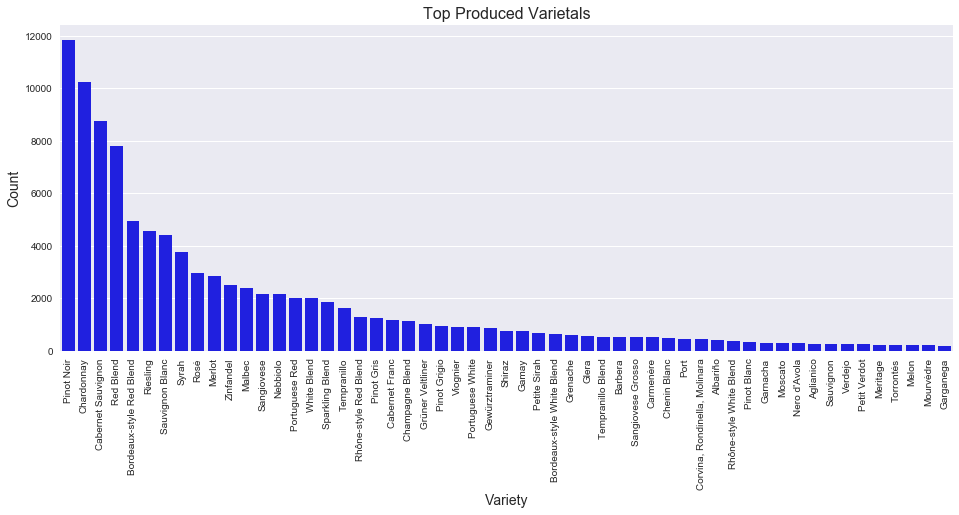

In [275]:
temp_variety_200 = temp_variety[temp_variety['count'] > 200]
print(len(temp_variety_200))

fig = plt.figure(figsize=(16, 6))

sns.barplot(x = 'variety', y = 'count', data=temp_variety_200, color='blue')

plt.xlabel('Variety', size=14)
plt.xticks(rotation=90)
plt.ylabel('Count', size=14)
plt.title('Top Produced Varietals', size=16)
plt.show()

### What is the relationship between price and points?

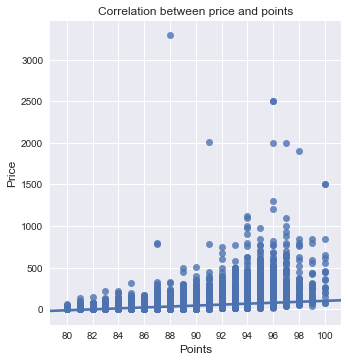

In [276]:
# Plot scatter plot
sns.lmplot(x = 'points', y = 'price', data=df)

plt.xlabel('Points', size=12)
plt.xticks(np.arange(min(df.points), max(df.points)+1, 2))
plt.ylabel('Price', size=12)
plt.title('Correlation between price and points')
plt.show()

As expected, there's a fairly strong correlation between Points and Price

### What about the distribution of Price and Points?

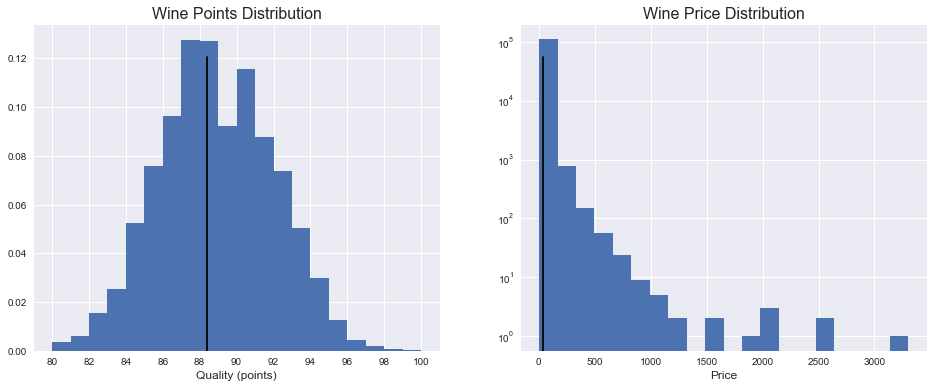

In [277]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.hist(df.points, bins=20, normed=True)
ax1.set_xlabel('Quality (points)', size=12)
ax1.set_xticks(np.arange(min(df.points), max(df.points)+1, 2.0))
ax1.set_title('Wine Points Distribution', size=16)
ax1.axvline(np.mean(df.points), 0, .9, color='black')

ax2.hist(df.price, bins=20, log=True)
ax2.set_xlabel('Price', size=12)
ax2.set_title('Wine Price Distribution', size=16)
ax2.axvline(np.mean(df.price), 0, .9, color='black')

plt.show()

The points follow a fairly normal distribution while the price is skewed to the left.

## Statistics

The top 5 wine producing countries in the world include the United States, and a series of European nations which includes France, Italy, Spain, and Portugal.

The United states outnumbers the second place country by far. If we add the next four countries, we still do not get to the amount of wine that the US produces, but it's a closer comparison.

Here, I'm wondering if there's a significant difference in quality between wines from the US and European wines from these four countries combined. Let's test that hypotheses.

### Add continent column and limit dataset to US and Europe

In [278]:
europe = ['France', 'Italy', 'Spain', 'Portugal']
us = ['US']

country_to_continent_map = {}
for i in df.country:
    if i in europe:
        country_to_continent_map[i] = 'Europe'
    elif i in us:
        country_to_continent_map[i] = 'USA'
    else:
        country_to_continent_map[i] = ''
df['continent'] = df.country.map(country_to_continent_map)
df_us_eu = df[(df.continent == 'USA') | (df.continent == 'Europe')]
df_us_eu.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,continent
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Europe
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,USA
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,USA
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,USA
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Europe


Let's plot the top viretals in these five countries only including the variety in the top 200 and removing blends

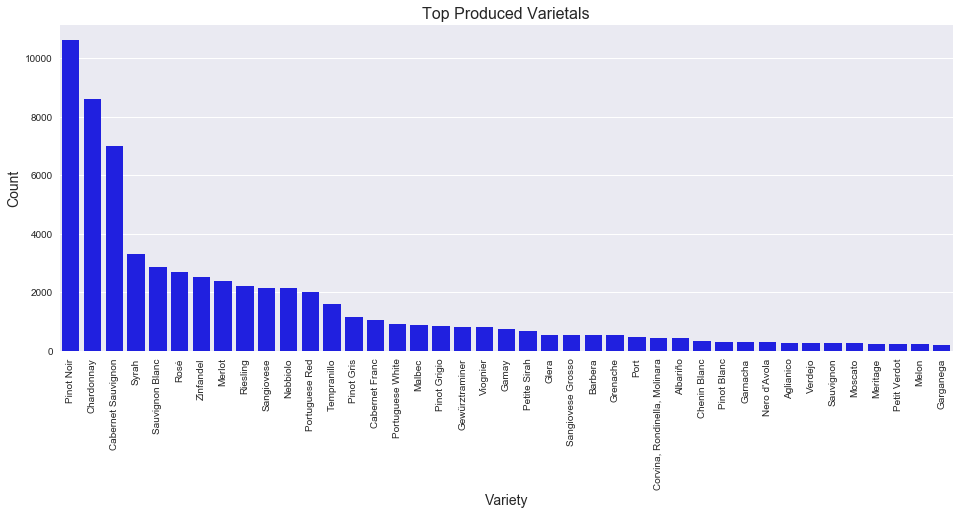

In [279]:
# Drop Varietals that are blends
df_us_eu = df_us_eu[(df_us_eu['variety'].str.contains('blend') == False) & (df_us_eu['variety'].str.contains('Blend') == False)]

temp = df_us_eu.groupby('variety', as_index=False)['continent'].count().sort_values(by='continent', ascending=False)
temp = temp[temp.continent > 200]

fig = plt.figure(figsize=(16, 6))

sns.barplot(x = 'variety', y = 'continent', data=temp, color='blue')

plt.xlabel('Variety', size=14)
plt.xticks(rotation=90)
plt.ylabel('Count', size=14)
plt.title('Top Produced Varietals', size=16)
plt.show()

### Is there a significant difference in the quality of wines from the US vs. wines from Europe?

$H_{O}$: There is no difference between the quality of wines from the U.S vs. wines from Europe.

$H_{A}$: There is a significant difference in quality between wines from the U.S. vs. wines from Europe.

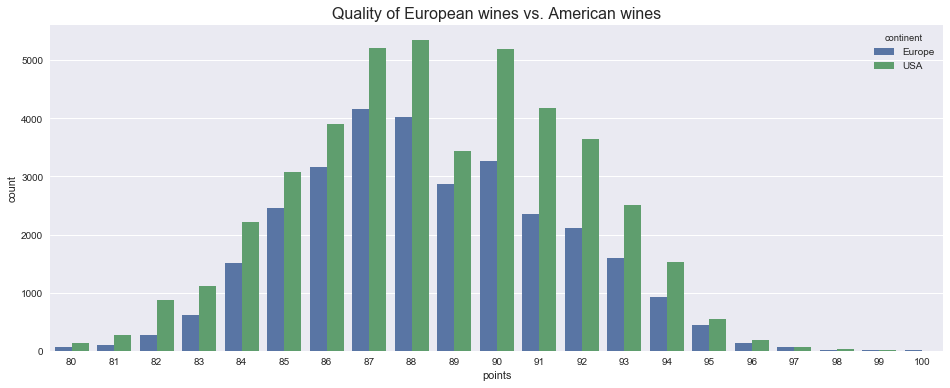

In [280]:
fig = plt.figure(figsize=(16, 6))

sns.countplot(x = 'points', hue='continent', data = df_us_eu)
plt.title('Quality of European wines vs. American wines', size=16)
plt.show()

Based on the graph above, wines from the USA have higher quality than the wines from Europe. Let's compute t-score and p-values to confirm

In [281]:
temp_us = df_us_eu[df_us_eu['continent'] == 'USA']
temp_eu = df_us_eu[df_us_eu['continent'] == 'Europe']

In [282]:
# Average quality scores
us_mean, eu_mean = np.mean(temp_us.points), np.mean(temp_eu.points)
print('Avg. quality score for U.S. wines: {:2.2f}'.format(us_mean))
print('Avg. quality score for European wines: {:2.2f}'.format(eu_mean))
print()
print('Avg. price for U.S wines: {:2.2f}'.format(np.mean(temp_us.price)))
print('Avg. price for European wines: {:2.2f}'.format(np.mean(temp_eu.price)))
print()

# Difference of means
diff_of_means = us_mean - eu_mean
print('The difference in means is: {:2.3f}'.format(diff_of_means))
print()

# t-score and p-value
t, p = stats.ttest_ind(temp_us.points, temp_eu.points)
print('t-score:', t)
print('p-value:', p)
print()

# Standard Error
SE = np.sqrt(np.std(temp_us.points)**2 / len(temp_us.points) + np.std(temp_eu.points)**2 / len(temp_eu.points))

merror = 1.96 * SE
print('Margin of error:', merror)
print()

# Confidence Interval
conf_int_95 = [diff_of_means - merror, diff_of_means + merror]
print('95% confidence interval:',conf_int_95)
print()

Avg. quality score for U.S. wines: 88.56
Avg. quality score for European wines: 88.46

Avg. price for U.S wines: 36.22
Avg. price for European wines: 36.93

The difference in means is: 0.098

t-score: 4.199702361400734
p-value: 2.6757954762831897e-05

Margin of error: 0.04535010285664067

95% confidence interval: [0.052645659590542994, 0.14334586530382434]



As we can see from the graph and the low p-value, we can reject the null hypothesis that US and European wines have the same quality on average. American wines have higher quality wines. Coincidently, US wines are cheaper on average.

In [283]:
average = df_us_eu.groupby('variety', as_index=False).aggregate({'points': 'mean',
                                                          'price': 'mean',
                                                          'country': 'count'}).sort_values(by='country', ascending=False)
average = average.reset_index()
average = average[['variety', 'points', 'price', 'country']] # Keep only required columns
average.columns = ['variety', 'points', 'price', 'count']    # Rename columns
average = average[average['count'] >= 200]
average.head(10)

,variety,points,price,count
0,Pinot Noir,89.642103,49.995288,10612
1,Chardonnay,88.601206,37.128987,8621
2,Cabernet Sauvignon,89.009408,54.440485,7015
3,Syrah,89.435528,39.869853,3327
4,Sauvignon Blanc,87.619481,21.989488,2854
5,Rosé,86.867483,18.723088,2694
6,Zinfandel,87.790310,29.433678,2518
7,Merlot,87.420744,31.661648,2391
8,Riesling,88.688123,22.953762,2206
9,Sangiovese,88.615777,45.519722,2155


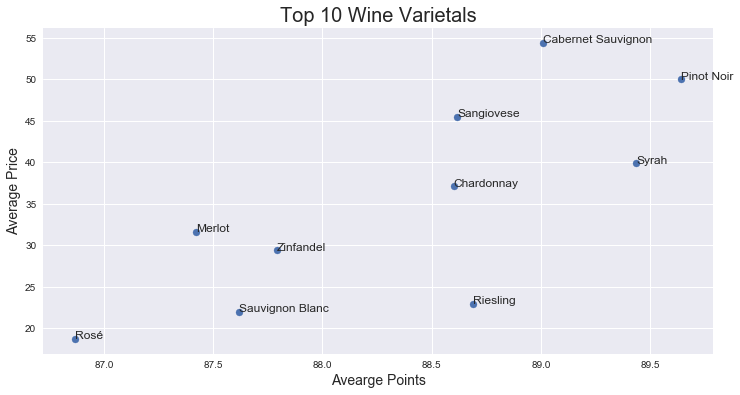

In [284]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(average.points.head(10), average.price.head(10))
for i, txt in enumerate(average.variety.head(10)):
    ax.annotate(txt, (average.points[i], average.price[i]))    

    
plt.xlabel('Avearge Points', size=14)
plt.ylabel('Average Price', size=14)
plt.title('Top 10 Wine Varietals', size=20)
plt.show()
plt.clf()

# Machine Learning

In this section, we're going to use the description field from the dataset to predict the variety (labels) of the wine.

In [285]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.decomposition import PCA, TruncatedSVD
from io import StringIO
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import unicodedata
from sklearn.feature_selection import chi2
from sklearn import metrics
from sklearn.metrics import confusion_matrix

col = ['description', 'variety']
df = df_us_eu[col]
df = df.groupby('variety').filter(lambda x: len(x) > 200)
print('Data shape:', df.shape)
print('Number of Classifiers:',len(df.variety.unique()))

Data shape: (64761, 2)
Number of Classifiers: 41


In [286]:
df = df.groupby('variety').filter(lambda x: len(x) > 2150)
temp = df.groupby('variety').nunique()
print('Data shape:', df.shape)
print('Number of Classifiers:', len(df.variety.unique()))

Data shape: (44393, 2)
Number of Classifiers: 10


### Calculate Model Baseline

Since my classification parameters are skewed, going to take the class that appears the most and devide it by the rest of the data.

In [287]:
temp = df.variety.value_counts()
pinot = temp[0]
total = np.sum(temp)
baseline = pinot/total
print('Starting baseline is: {:2.2%}'.format(baseline))

Starting baseline is: 23.90%


### Inspect Data

In [288]:
df['category_id'] = df['variety'].factorize()[0]
category_id_df = df[['variety', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'variety']].values)

In [289]:
df.head()

,description,variety,category_id
3,"Pineapple rind, lemon pith and orange blossom ...",Riesling,0
4,"Much like the regular bottling from 2012, this...",Pinot Noir,1
10,"Soft, supple plum envelopes an oaky structure ...",Cabernet Sauvignon,2
12,"Slightly reduced, this wine offers a chalky, t...",Cabernet Sauvignon,2
14,Building on 150 years and six generations of w...,Chardonnay,3


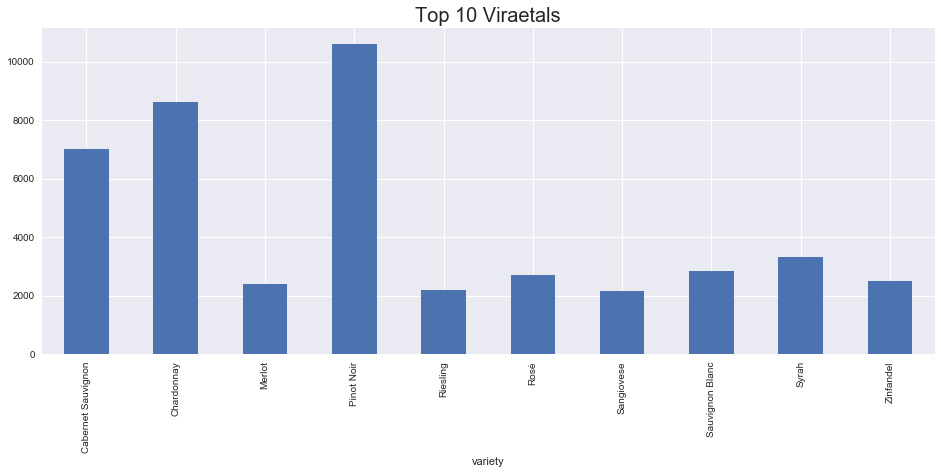

variety
Sangiovese             2155
Riesling               2206
Merlot                 2391
Zinfandel              2518
Rosé                   2694
Sauvignon Blanc        2854
Syrah                  3327
Cabernet Sauvignon     7015
Chardonnay             8621
Pinot Noir            10612
Name: description, dtype: int64

In [339]:
fig = plt.figure(figsize=(16, 6))
varietals = df.groupby('variety').description.count().plot.bar(ylim=0)
plt.title('Top 10 Viraetals', size=20)
plt.show()

df.groupby('variety').description.count().sort_values()

In [291]:
tfidf = TfidfVectorizer(sublinear_tf=True, 
                        min_df=5, norm='l2', 
                        encoding='latin-1', 
                        ngram_range=(1, 2), 
                        stop_words='english')

first_features = tfidf.fit_transform(df.description).toarray()
first_labels = df.variety
print(first_features.shape)
print(first_labels.shape)

(44393, 39153)
(44393,)


### Clean Data

In [312]:
nlp = spacy.load('en', parse = False, tag=False, entity=False)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

# Clean Step - strip HTML
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

# Removing accented characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

# Removing Special Characters
def remove_special_characters(text):
    text = re.sub('[^a-zA-Z0-9\s]', '', text)
    return text

# Lemmatize Text
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

# Removing Stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

# Normalize corpus
def normalize_corpus(corpus, html_stripping=True, accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters    
        if special_char_removal:
            doc = remove_special_characters(doc)
        doc = re.sub(r'\d+', '', doc)
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [313]:
normalized_corpus = normalize_corpus(df.description)

In [314]:
# Reinspect data after cleaning
tfidf = TfidfVectorizer(sublinear_tf=True, 
                        min_df=5, norm='l2', 
                        encoding='latin-1', 
                        ngram_range=(1, 2), 
                        stop_words='english')

features = tfidf.fit_transform(normalized_corpus).toarray()
labels = df.variety
print(features.shape)
print(labels.shape)

(44393, 37269)
(44393,)


### Compare Models

In [341]:
from sklearn.svm import LinearSVC
models = [RandomForestClassifier(n_estimators=200, max_depth=3),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression()]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

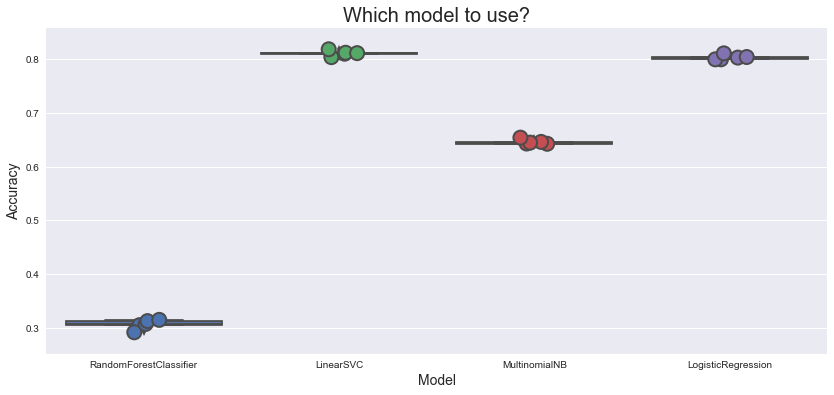

In [345]:
fig = plt.figure(figsize=(14, 6))
sns.boxplot(x='model_name', 
            y='accuracy', 
            data=cv_df)
sns.stripplot(x='model_name', 
              y='accuracy', 
              data=cv_df,
              size=14,
              jitter=True,
              edgecolor='gray',
              linewidth=2)
plt.xlabel('Model', size=14)
plt.ylabel('Accuracy', size=14)
plt.title('Which model to use?', size=20)
plt.show()

In [346]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.810984
LogisticRegression        0.803326
MultinomialNB             0.645959
RandomForestClassifier    0.306221
Name: accuracy, dtype: float64

In [347]:
model = LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    labels,
                                                    random_state=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

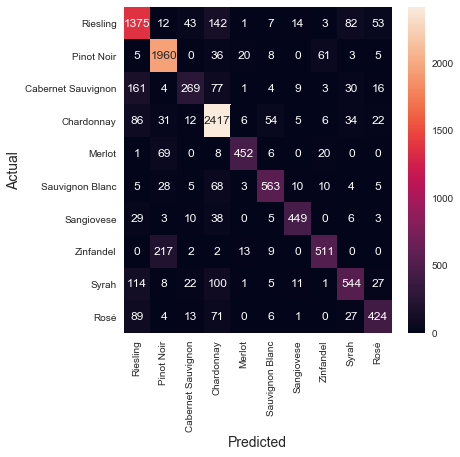

In [348]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(conf_mat, 
            annot=True, 
            fmt='d',
            xticklabels = category_id_df.variety.values,
            yticklabels = category_id_df.variety.values)
plt.ylabel('Actual', size=14)
plt.xlabel('Predicted', size=14)
plt.show()

In [319]:
print(metrics.classification_report(y_test, y_pred,
                                    target_names = df.variety.unique()))

                    precision    recall  f1-score   support

          Riesling       0.74      0.79      0.76      1732
        Pinot Noir       0.84      0.93      0.88      2098
Cabernet Sauvignon       0.72      0.47      0.57       574
        Chardonnay       0.82      0.90      0.86      2673
            Merlot       0.91      0.81      0.86       556
   Sauvignon Blanc       0.84      0.80      0.82       701
        Sangiovese       0.90      0.83      0.86       543
         Zinfandel       0.83      0.68      0.75       754
             Syrah       0.75      0.65      0.70       833
              Rosé       0.76      0.67      0.71       635

       avg / total       0.81      0.81      0.80     11099



In [320]:
model.fit(features, labels)
N = 4
for Product, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(Product))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Cabernet Sauvignon':
  . Top unigrams:
       . merlot
       . grind
       . plum
       . tannin
  . Top bigrams:
       . sauvignon cabernet
       . dark raspberry
       . include cabernet
       . addition cabernet
# 'Chardonnay':
  . Top unigrams:
       . pinot
       . cherry
       . cola
       . pomegranate
  . Top bigrams:
       . black sage
       . white pinot
       . cranberry fruit
       . blanc noir
# 'Merlot':
  . Top unigrams:
       . riesling
       . riesl
       . dry
       . petrol
  . Top bigrams:
       . medium sweet
       . dry palate
       . residual sugar
       . palate come
# 'Pinot Noir':
  . Top unigrams:
       . chardonnay
       . chard
       . apple
       . chablis
  . Top bigrams:
       . yellow fruit
       . green plum
       . blanc blanc
       . taste sour
# 'Riesling':
  . Top unigrams:
       . cabernet
       . cab
       . cassis
       . blackberry
  . Top bigrams:
       . merlot syrah
       . small merlot
       . pure c

#### Adjust Parameters and re-check top two models

In [322]:
# Linear SVC with GridSearchCV
x1, x2, y1, y2 = train_test_split(features, labels, test_size=0.3, random_state=4)

param_grid = {'C': np.arange(0.1, 1.1, 0.1)}
grid = GridSearchCV(LinearSVC(), param_grid=param_grid, cv=5)
grid.fit(x1, y1)
print('Best cross-validation score: {:.2f}'.format(grid.best_score_))
print('Best parameters: ',grid.best_params_)

Best cross-validation score: 0.81
Best parameters:  {'C': 0.5}


In [323]:
# Logistic Regression with GridSearchCV

param_grid = {'C': np.arange(0.8, 1.1, 0.1)}
grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5)
grid.fit(x1, y1)
print('Best cross-validation score: {:.2f}'.format(grid.best_score_))
print('Best parameters: ',grid.best_params_)

Best cross-validation score: 0.79
Best parameters:  {'C': 1.0}


In [ ]:
# # Linear SVC with RandomizedSearchCV

# param_grid = {'C': np.arange(0.1, 1.1, 0.1)}
# grid = RandomizedSearchCV(LinearSVC(), param_distributions=param_grid, cv=5)
# grid.fit(x1, y1)
# print('Best cross-validation score: {:.2f}'.format(grid.best_score_))
# print('Best parameters: ',grid.best_params_)

In [ ]:
# # Logistic Regression with GridSearchCV

# param_grid = {'C': np.arange(0.1, 1.1, 0.1)}
# grid = RandomizedSearchCV(LogisticRegression(), param_distributions=param_grid, cv=5)
# grid.fit(x1, y1)
# print('Best cross-validation score: {:.2f}'.format(grid.best_score_))
# print('Best parameters: ',grid.best_params_)

### Recheck accuracy with tuned hyperparameters

In [324]:
models = [LinearSVC(C = 0.5),
          LogisticRegression(C = 1.0)]
CV = 5
cv_df1 = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df1 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [342]:
fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='model_name', 
            y='accuracy', 
            data=cv_df1)
sns.stripplot(x='model_name', 
              y='accuracy', 
              data=cv_df1,
              size=14,
              jitter=True,
              edgecolor='gray',
              linewidth=2)
plt.xlabel('Model', size=14)
plt.ylabel('Accuracy', size=14)
plt.title('Which Model has better accuracy?', size=20)
plt.show()

NameError: name 'cv_df1' is not defined

In [326]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC             0.815152
LogisticRegression    0.803326
Name: accuracy, dtype: float64

### Fit best model

In [332]:
model = LinearSVC(C = 0.5)
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    labels,
                                                    random_state=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

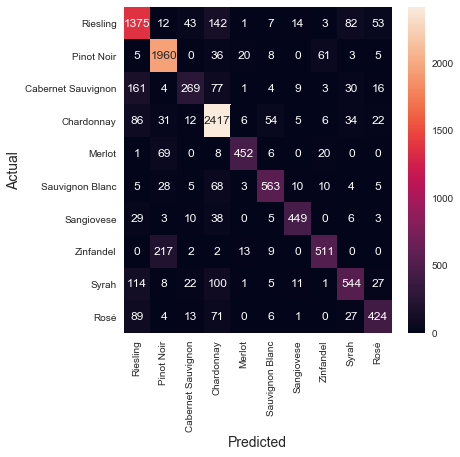

In [349]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(conf_mat, 
            annot=True, 
            fmt='d',
            xticklabels = category_id_df.variety.values,
            yticklabels = category_id_df.variety.values)
plt.ylabel('Actual', size=14)
plt.xlabel('Predicted', size=14)
plt.show()

In [334]:
print(metrics.classification_report(y_test, y_pred,
                                    target_names = df.variety.unique()))

                    precision    recall  f1-score   support

          Riesling       0.74      0.80      0.77      1732
        Pinot Noir       0.83      0.94      0.88      2098
Cabernet Sauvignon       0.75      0.45      0.56       574
        Chardonnay       0.81      0.92      0.86      2673
            Merlot       0.91      0.81      0.86       556
   Sauvignon Blanc       0.86      0.81      0.83       701
        Sangiovese       0.91      0.82      0.86       543
         Zinfandel       0.85      0.67      0.75       754
             Syrah       0.77      0.65      0.70       833
              Rosé       0.80      0.68      0.73       635

       avg / total       0.81      0.81      0.81     11099



In [335]:
model.fit(features, labels)
N = 4
for Product, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(Product))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Cabernet Sauvignon':
  . Top unigrams:
       . merlot
       . plum
       . tannin
       . grind
  . Top bigrams:
       . sauvignon cabernet
       . dark raspberry
       . pure merlot
       . include cabernet
# 'Chardonnay':
  . Top unigrams:
       . pinot
       . cherry
       . cola
       . pomegranate
  . Top bigrams:
       . cranberry fruit
       . black tea
       . cherry fruit
       . red fruit
# 'Merlot':
  . Top unigrams:
       . riesling
       . riesl
       . dry
       . petrol
  . Top bigrams:
       . medium sweet
       . dry palate
       . residual sugar
       . dry style
# 'Pinot Noir':
  . Top unigrams:
       . chardonnay
       . chard
       . apple
       . butter
  . Top bigrams:
       . yellow fruit
       . green plum
       . blanc blanc
       . tropical fruit
# 'Riesling':
  . Top unigrams:
       . cabernet
       . cab
       . cassis
       . blackberry
  . Top bigrams:
       . black currant
       . pure cabernet
       . small merl